# --------------------------------------- Workshop #3 -------------------------------------


* This workshop includes marked tasks that comprise 25% of your final mark in this module. 

* You need to read the examples in the 'Lecture #3 - examples' notebook to complete the tasks. 

# Task

## TASK 3.1: Apply four classifiers discussed in Lecture #3, i.e. Support Vector Machine (SVM), Decision Tree (DT), Random Forest (RF), and K-nearest neighbours (KNN) classifiers to the adult_WS#3 dataset available on Canvas to predict the income column. Calculate the confusion matrix and evaluation metrics for all classifiers. Plot the features' importance values, determine the three most important features (i.e. columns) which have the highest impact on the income and report them in the report cell  (25%). 

## NOTE1: To decrease the processing time, use an ordinal encoder for both nominal and ordinal input columns. You don't need to apply the one hot encoder to nominal columns. 

## NOTE2 You are expected to improve your models in any way possible to get as high accuracy as possible.

## NOTE3: You should add comments on your code wherever necessary and briefly explain what the code is doing

## NOTE4: Completing the report cell is required only for reporting the three most important features. Other explanations are optional. 

## NOTE5: You will still get some marks if your code doesn't run, but you have written some codes and have added comments on the code. 


In [1]:
############# WRITE YOUR CODE IN THIS CELL (IF APPLICABLE)####################
import pandas as pd
import numpy as np

# importing the dataset
data1=pd.read_csv('adult_WS#3.csv')


# EXPLORING THE DATASET

In [2]:
#viewing the dimension of the data
data1.shape

(10000, 15)

In [3]:
#viewing the datatype
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             10000 non-null  int64 
 1   workclass       9825 non-null   object
 2   fnlwgt          10000 non-null  int64 
 3   education       10000 non-null  object
 4   education-num   10000 non-null  int64 
 5   marital-status  10000 non-null  object
 6   occupation      9825 non-null   object
 7   relationship    10000 non-null  object
 8   race            10000 non-null  object
 9   sex             10000 non-null  object
 10  capital-gain    10000 non-null  int64 
 11  capital-loss    10000 non-null  int64 
 12  hours-per-week  10000 non-null  int64 
 13  native-country  9939 non-null   object
 14  income          10000 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.1+ MB


In [4]:
#Lookingout for columns with Null values
data1.isna().sum()

age                 0
workclass         175
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        175
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country     61
income              0
dtype: int64

In [5]:
#Summary of descriptive statistics 
data1.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,10000.000000,1.000000e+04,10000.000000,10000.00000,10000.000000,10000.000000
mean,38.603400,1.895382e+05,10.071000,1029.02620,90.598900,40.453900
std,13.725842,1.054084e+05,2.564803,6999.48071,411.768551,12.328571
min,17.000000,1.228500e+04,1.000000,0.00000,0.000000,1.000000
25%,28.000000,1.177890e+05,9.000000,0.00000,0.000000,40.000000
50%,37.000000,1.781470e+05,10.000000,0.00000,0.000000,40.000000
75%,48.000000,2.367728e+05,12.000000,0.00000,0.000000,45.000000
max,90.000000,1.366120e+06,16.000000,99999.00000,3770.000000,99.000000


In [6]:
#Fnlwgt is a redundant column with numerous outliers
data1 = data1.drop(['fnlwgt'], axis = 1)

In [7]:
#Incase the machine will be needing a data free of Null values 
data=data1.dropna(inplace=True)

In [8]:
#viewing the dataset at maximum
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
data1.head(100)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,29,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,>50K
1,36,Private,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,<=50K
2,25,?,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,25,United-States,<=50K
3,47,Private,Assoc-voc,11,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,48,United-States,>50K
4,33,Private,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
5,37,Private,HS-grad,9,Never-married,Sales,Unmarried,White,Male,0,0,40,United-States,<=50K
6,34,Private,HS-grad,9,Separated,Handlers-cleaners,Unmarried,White,Female,0,0,40,United-States,<=50K
7,38,Private,HS-grad,9,Married-civ-spouse,Other-service,Wife,White,Female,0,0,43,United-States,<=50K
8,62,Private,HS-grad,9,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40,United-States,<=50K
9,50,Local-gov,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,4064,0,55,United-States,<=50K


DATA PREPROCESSING 

In [9]:
#Columns with Null values
data1.isna().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [10]:
#Replacing all categorical columns with Null values with Mode
Null_columns= ['workclass', 'occupation', 'native-country']

#Replace Null values with mode
for column in Null_columns:
    mode = data1[column].mode()[0]
    data1[column].fillna(mode,inplace = True)
    
#viewing the new update
data1.isna().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [11]:
# Importing necessary libraries
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Initialize the OrdinalEncoder
encoder = OrdinalEncoder()

# Encode multiple categorical columns
columns = ['workclass', 'education', 'occupation','marital-status','relationship','race','sex','native-country','income']
data_encoded = data1.copy()  # Create a copy to avoid modifying the original DataFrame

# Fit and transform the encoder on the specified columns
data_encoded[columns] = encoder.fit_transform(data1[columns]).astype(int)

# Display the encoded DataFrame
print("\nEncoded DataFrame:")
print(data_encoded.head())



Encoded DataFrame:
   age  workclass  education  education-num  marital-status  occupation  \
0   29          4         12             14               2           4   
1   36          4         15             10               2           3   
2   25          0          9             13               2           0   
3   47          4          8             11               2           6   
4   33          4         11              9               2           4   

   relationship  race  sex  capital-gain  capital-loss  hours-per-week  \
0             5     4    0             0             0              40   
1             0     4    1             0             0              45   
2             5     4    0             0             0              25   
3             0     4    1             0             0              48   
4             0     4    1             0             0              40   

   native-country  income  
0              38       1  
1              38       0  


In [12]:
#viewing the effect of my encoding 
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9765 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             9765 non-null   int64
 1   workclass       9765 non-null   int32
 2   education       9765 non-null   int32
 3   education-num   9765 non-null   int64
 4   marital-status  9765 non-null   int32
 5   occupation      9765 non-null   int32
 6   relationship    9765 non-null   int32
 7   race            9765 non-null   int32
 8   sex             9765 non-null   int32
 9   capital-gain    9765 non-null   int64
 10  capital-loss    9765 non-null   int64
 11  hours-per-week  9765 non-null   int64
 12  native-country  9765 non-null   int32
 13  income          9765 non-null   int32
dtypes: int32(9), int64(5)
memory usage: 801.0 KB


In [13]:
#Extracting input and output data
X=data_encoded.drop('income',axis=1)
y=data_encoded.iloc[:,13]

In [14]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: income, dtype: int32

In [15]:
#normalising the input data to group the data into similar measuring scale 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X=scaler.fit_transform(X)

In [16]:
#viewing the normalized input data
X

array([[0.16438356, 0.5       , 0.8       , ..., 0.        , 0.39795918,
        0.95      ],
       [0.26027397, 0.5       , 1.        , ..., 0.        , 0.44897959,
        0.95      ],
       [0.10958904, 0.        , 0.6       , ..., 0.        , 0.24489796,
        0.95      ],
       ...,
       [0.17808219, 0.5       , 0.73333333, ..., 0.        , 0.39795918,
        0.95      ],
       [0.32876712, 0.75      , 0.53333333, ..., 0.        , 0.39795918,
        0.95      ],
       [0.05479452, 0.5       , 1.        , ..., 0.        , 0.39795918,
        0.95      ]])

In [17]:
#encoding the output data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(y)

In [18]:
#viewing the values in Y the output data
y

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [19]:
# splittig the dataset into train and test datasets by 70:30, train : test respectively
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

# The Classification Stage

In [20]:
# Step 1: defining the classification models 
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
SVM = svm.SVC()
RF = RandomForestClassifier()
KNN = KNeighborsClassifier()
DT=DecisionTreeClassifier()

In [21]:
#Step 2: training the models 
SVM.fit(X_train, y_train)
RF.fit(X_train, y_train)
KNN.fit(X_train, y_train)
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
#Step 3: prediction
y_pred1=SVM.predict(X_test)
y_pred2=RF.predict(X_test)
y_pred3=KNN.predict(X_test)
y_pred4=DT.predict(X_test)

Text(0.5, 1.0, 'Decision Tree Classifier')

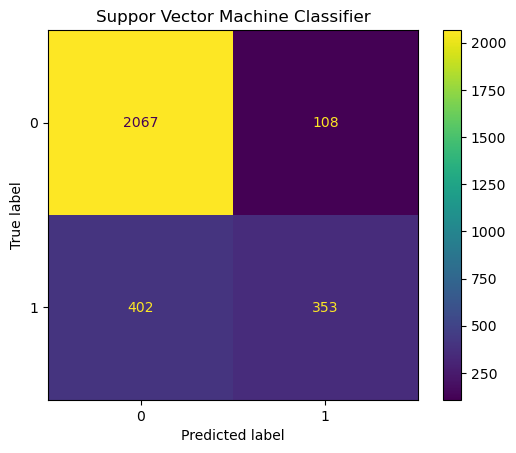

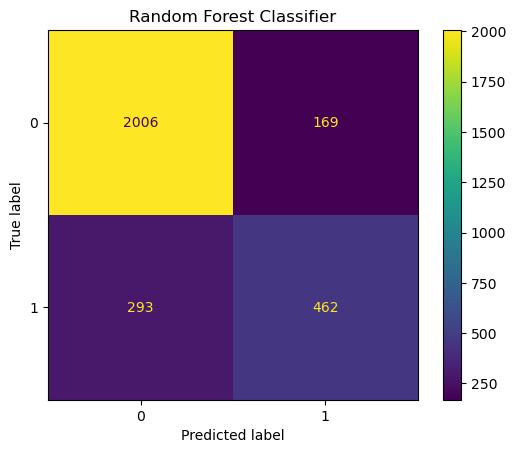

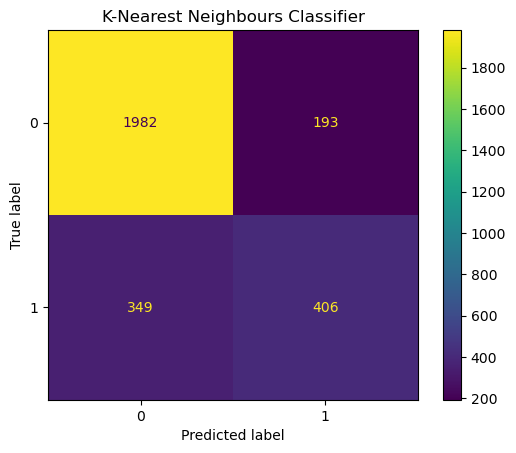

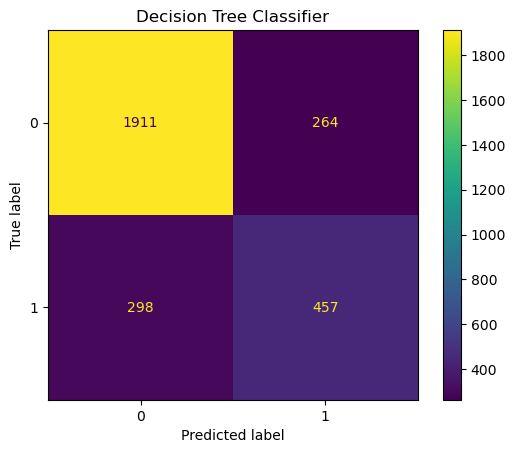

In [23]:
# Creating the confusion matrics for all classifiers' predictions
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#create confusion matrix
cm_SVM = confusion_matrix(y_test, y_pred1, labels=SVM.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_SVM,display_labels=SVM.classes_)
disp.plot()
plt.title("Suppor Vector Machine Classifier")


cm_RF = confusion_matrix(y_test, y_pred2, labels=RF.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_RF,display_labels=RF.classes_)
disp.plot()
plt.title("Random Forest Classifier")


cm_KNN = confusion_matrix(y_test, y_pred3, labels=KNN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_KNN,display_labels=KNN.classes_)
disp.plot()
plt.title("K-Nearest Neighbours Classifier")

cm_DT = confusion_matrix(y_test, y_pred4, labels=DT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_DT,display_labels=DT.classes_)
disp.plot()
plt.title("Decision Tree Classifier")


In [24]:
# This function takes the confusion matrix (cm) from the cell above and produces all evaluation matrix
def confusion_metrics (conf_matrix):

    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}') 
    print(f'Mis-Classification: {round(conf_misclassification,2)}') 
    print(f'Sensitivity: {round(conf_sensitivity,2)}') 
    print(f'Specificity: {round(conf_specificity,2)}') 
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')

In [25]:
#printing the evaluation metrics for all classifiers
print('Suppor Vector Machine Metrics\n')
confusion_metrics(cm_SVM)
print('\n\n')
print('Random Forest metrics\n')
confusion_metrics(cm_RF)
print('\n\n')
print('K-Nearest Neighbours metrics\n')
confusion_metrics(cm_KNN)
print('\n\n')
print('Decision Tree metrics\n')
confusion_metrics(cm_DT)
print('\n\n')

Suppor Vector Machine Metrics

True Positives: 353
True Negatives: 2067
False Positives: 108
False Negatives: 402
--------------------------------------------------
Accuracy: 0.83
Mis-Classification: 0.17
Sensitivity: 0.47
Specificity: 0.95
Precision: 0.95
f_1 Score: 0.63



Random Forest metrics

True Positives: 462
True Negatives: 2006
False Positives: 169
False Negatives: 293
--------------------------------------------------
Accuracy: 0.84
Mis-Classification: 0.16
Sensitivity: 0.61
Specificity: 0.92
Precision: 0.92
f_1 Score: 0.74



K-Nearest Neighbours metrics

True Positives: 406
True Negatives: 1982
False Positives: 193
False Negatives: 349
--------------------------------------------------
Accuracy: 0.82
Mis-Classification: 0.18
Sensitivity: 0.54
Specificity: 0.91
Precision: 0.91
f_1 Score: 0.68



Decision Tree metrics

True Positives: 457
True Negatives: 1911
False Positives: 264
False Negatives: 298
--------------------------------------------------
Accuracy: 0.81
Mis-Class

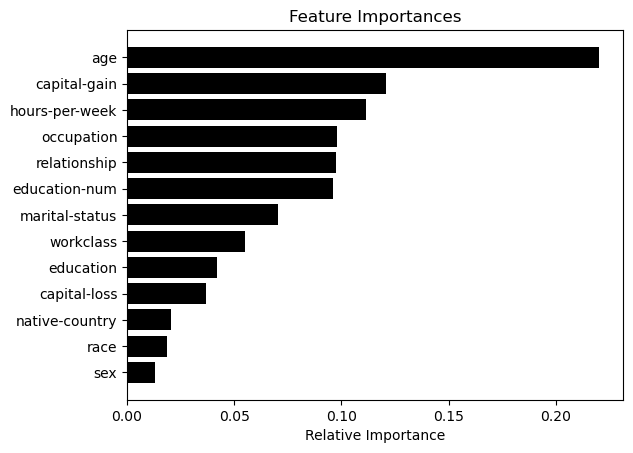

In [28]:
# Getting the most important features
features = data_encoded.columns
importances = RF.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='black', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [27]:
importances

array([0.22040589, 0.05502573, 0.04195692, 0.09586632, 0.0704012 ,
       0.09802009, 0.09741029, 0.01849398, 0.01299508, 0.1207516 ,
       0.0368234 , 0.11139297, 0.02045653])

#TOTAL WORDS 590